<a href="https://colab.research.google.com/github/TuNguyen142/AL-13-2/blob/main/Hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/bt al/Hoa

/content/drive/MyDrive/bt al/Hoa


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/bt al/Hoa/Flowers',
                                               target_size=(30,40), batch_size=32, class_mode='categorical')

Found 100 images belonging to 5 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'apricot': 0, 'daisy': 1, 'lotus': 2, 'rose': 3, 'waterlily': 4}

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [14]:
# Thiết lập thông số
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)
)

<ipython-input-14-f5aecfae2108>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)


Epoch 1/80
4/4 [==============================] - 7s 2s/step - loss: 1.6164 - accuracy: 0.2300
Epoch 2/80
4/4 [==============================] - 5s 896ms/step - loss: 1.5350 - accuracy: 0.5500
Epoch 3/80
4/4 [==============================] - 6s 1s/step - loss: 1.3997 - accuracy: 0.5500
Epoch 4/80
4/4 [==============================] - 7s 1s/step - loss: 1.2046 - accuracy: 0.5700
Epoch 5/80
4/4 [==============================] - 5s 2s/step - loss: 0.9962 - accuracy: 0.5700
Epoch 6/80
4/4 [==============================] - 5s 1s/step - loss: 0.8691 - accuracy: 0.6600
Epoch 7/80
4/4 [==============================] - 7s 2s/step - loss: 0.7173 - accuracy: 0.6500
Epoch 8/80
4/4 [==============================] - 5s 971ms/step - loss: 0.6056 - accuracy: 0.7300
Epoch 9/80
4/4 [==============================] - 6s 2s/step - loss: 0.5676 - accuracy: 0.7600
Epoch 10/80
4/4 [==============================] - 7s 2s/step - loss: 0.4898 - accuracy: 0.8100
Epoch 11/80
4/4 [==========================

In [15]:
model.save('/content/drive/MyDrive/bt al/Hoa/flowers.h5')

In [16]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03410027176141739
Train Accuracy 0.9900000095367432


<function matplotlib.pyplot.show(close=None, block=None)>

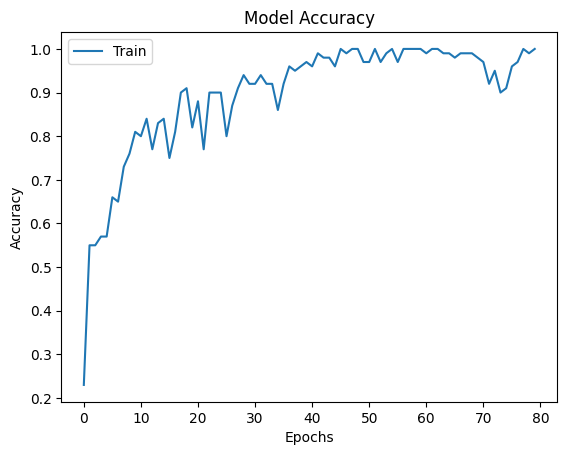

In [18]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(a.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [19]:
model1= load_model('/content/drive/MyDrive/bt al/Hoa/flowers.h5')

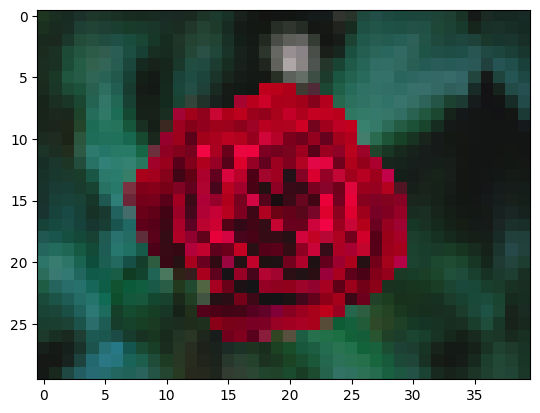

In [28]:
img = load_img('/content/drive/MyDrive/bt al/Hoa/test/Hoa hồng.jpg', target_size=(30,40))
plt.imshow(img)

In [27]:
class_name=['apricot', 'daisy', 'lotus', 'rose', 'waterlily']

In [33]:
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,30,40,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
class_name[y_classes[0]]

1/1 [==============================] - 0s 34ms/step
[[1.8055417e-07 3.0994824e-15 1.1899194e-07 9.9999809e-01 1.5026643e-06]]


'rose'